1.Importing the depencies

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN #to build a uniformly distributed traget class(class imbalnce issue)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter
import pickle

import warnings
warnings.filterwarnings('ignore')


2.Data loading and Understanding

In [476]:
#load the csv data to a pandas dataframe
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [477]:
df.shape #gives no of rows and coloumns


(7043, 21)

In [478]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [479]:
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [481]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [482]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [483]:
print(df["gender"].unique())

['Female' 'Male']


In [484]:
#printing the unique values in all the columns
numerical_features =["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [485]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [486]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [487]:
len(df[df["TotalCharges"]==" "])

11

In [488]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"})


In [489]:
#converting the object type to float
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [491]:
#Checking the class distribution of target col
print(df["Churn"].value_counts()) #we can see the data is imbalanced

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
1. Custmore id is removed it is not requuired for modelling
2. no missing values in the dataset
3. missing values in totalcharges col were repplaced with 0
4. class imablance is idientified in the traget

3. Exploratory Data Analysis(EDA)

In [492]:
df.shape

(7043, 20)

In [493]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [494]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [495]:
df.describe()#gives descriptive statistical analysis like mean median mode etc.
#only works on numerical data not on categorical data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical features - Analysis**

Understand the distribution of the numerical features

In [496]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  #calc the mean and meadina values for the cols
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  #add vertical lines for mean and medain
  plt.axvline(col_mean, color="red", linestyle="dashed", label="Mean")
  plt.axvline(col_median, color="green", linestyle="dashed", label="Median")

  plt.legend()
  plt.show()

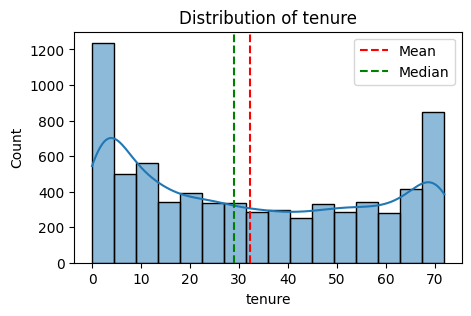

In [497]:
 plot_histogram(df, "tenure")

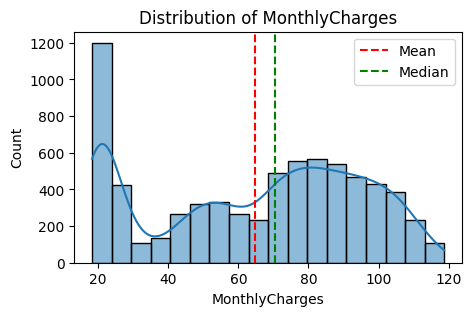

In [498]:
 plot_histogram(df, "MonthlyCharges")

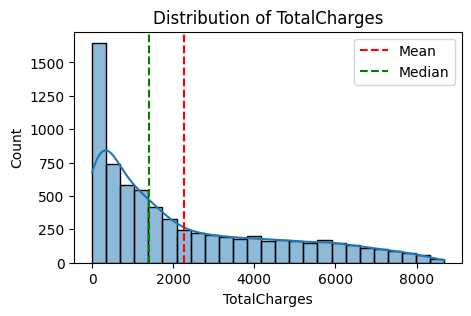

In [499]:
 plot_histogram(df, "TotalCharges")

**box plot for numerical features**

is to identify the outliers, above the line  dots represents outliers


In [500]:
 def plot_boxplot(df, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Boxplot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

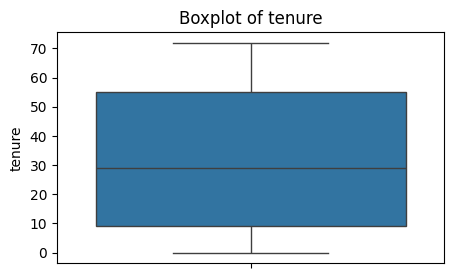

In [501]:
plot_boxplot(df, "tenure")

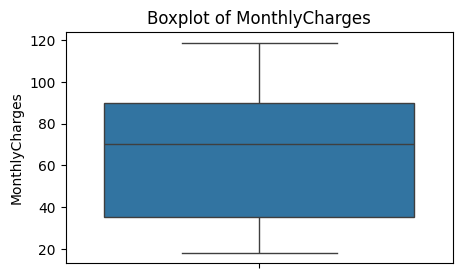

In [502]:
plot_boxplot(df, "MonthlyCharges")

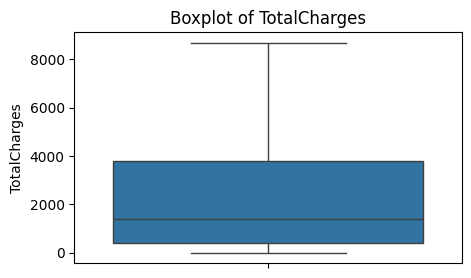

In [503]:
 plot_boxplot(df, "TotalCharges")

**Correlation heat map for numerical features**

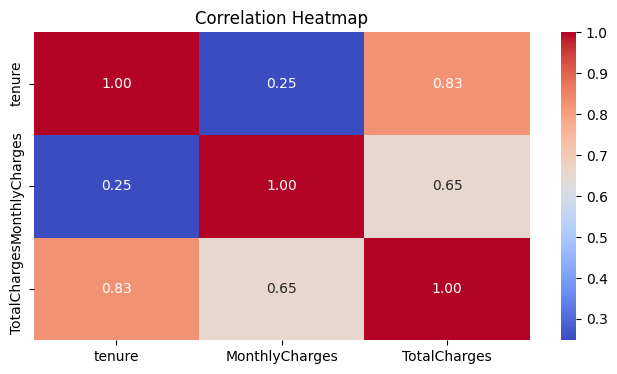

In [504]:
#correaltion matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Categorical feature Analysis**

In [505]:
 df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


for Categorical plot we use count plot says how these categorical features are distributed, like evenly or there any imbalnace

In [507]:
object_cols = df.select_dtypes(include="object").columns.to_list()
#include senior citizzen also as object
object_cols=["SeniorCitizen"] + object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

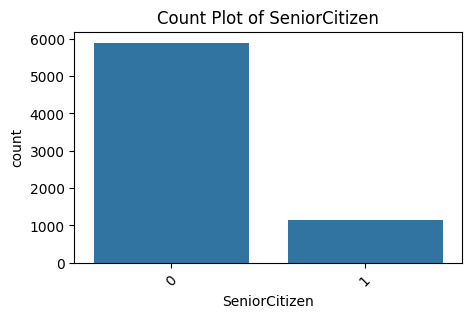

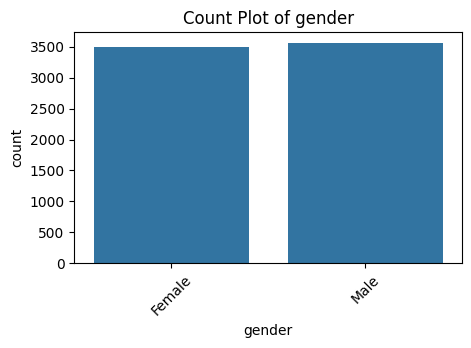

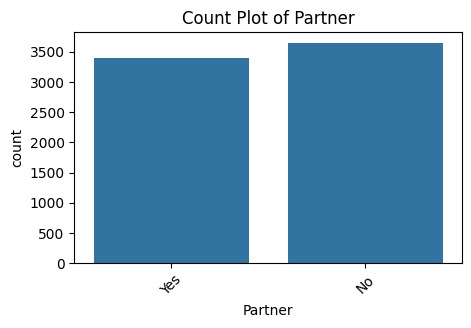

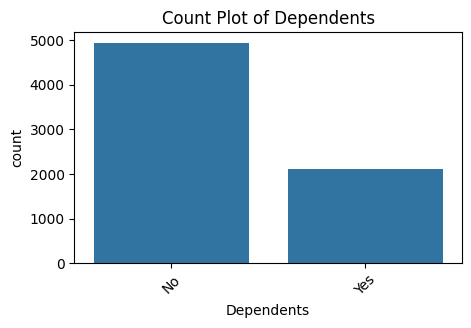

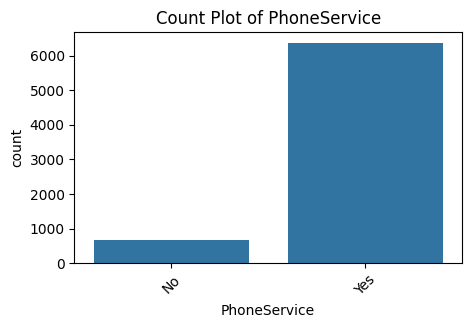

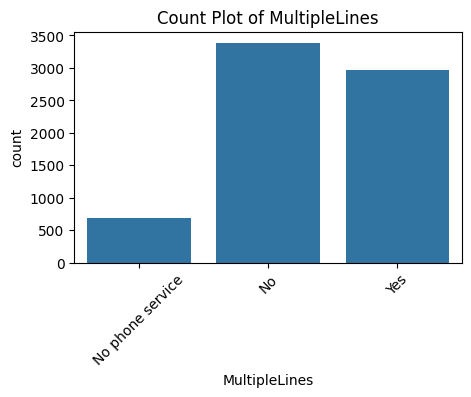

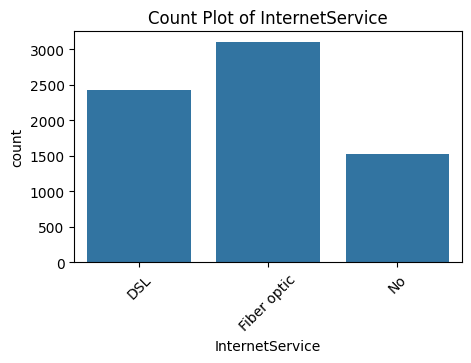

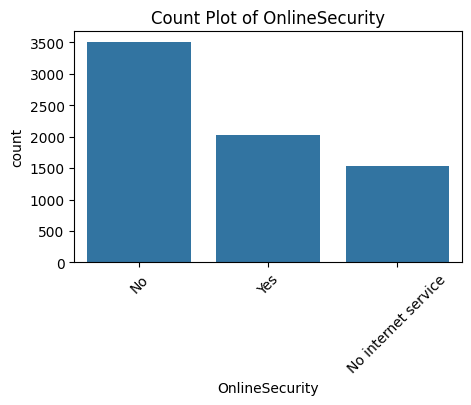

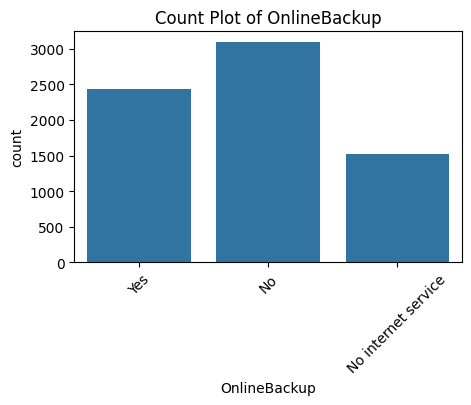

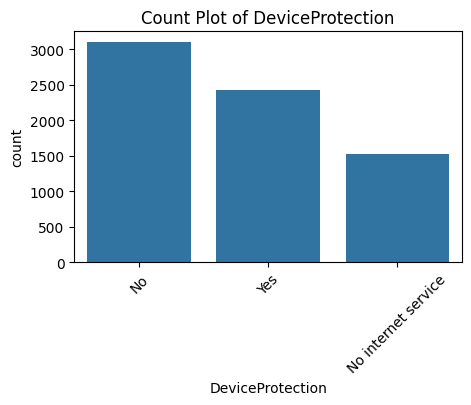

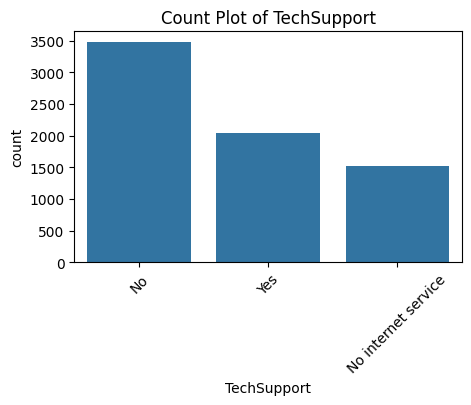

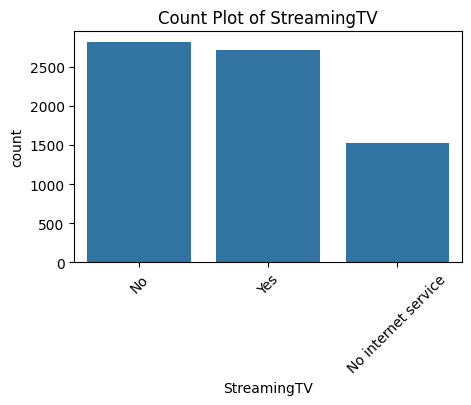

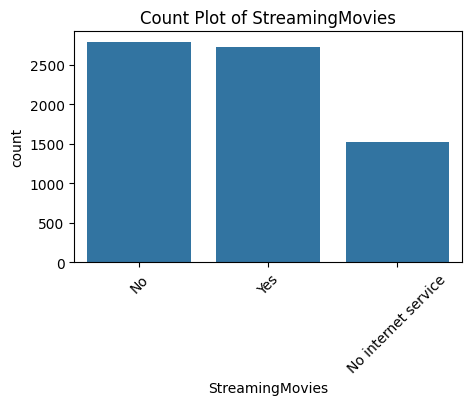

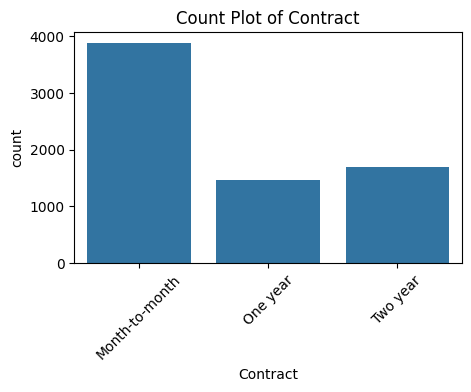

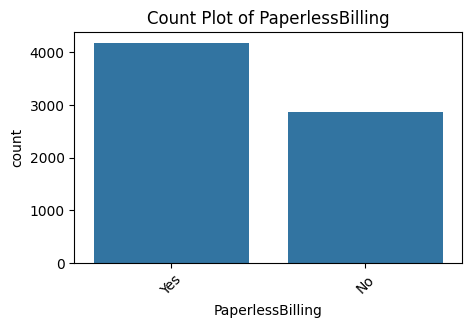

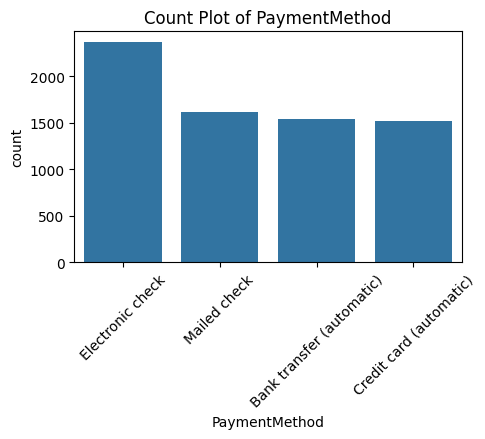

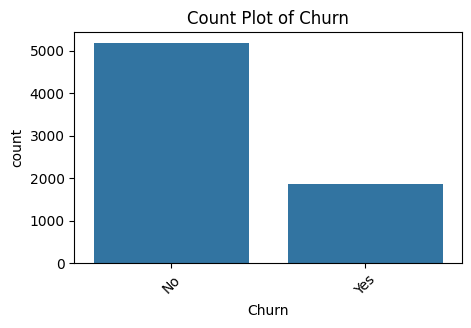

In [508]:
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(data=df, x=col)
  plt.title(f"Count Plot of {col}")
  plt.xticks(rotation=45)
  plt.show

**4. Data Preprocessing**

label encoding

In [509]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target column

In [510]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [511]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [512]:
print(df["Churn"].value_counts()) #yes-1, no-0

Churn
0    5174
1    1869
Name: count, dtype: int64


In [513]:
object_columns = df.select_dtypes(include="object").columns

In [514]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [515]:

encoder = LabelEncoder()
for feature in object_columns:
    df[feature] = encoder.fit_transform(df[feature])
# apply label encoding and store the encoders



In [516]:
encoder

LabelEncoder()

**Training and test data split**

In [517]:
from re import X
#splitting the features and traget
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [518]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Selection**

In [519]:
# selects the feature which has more correlation
from sklearn.feature_selection import SelectKBest
selection = SelectKBest()  # k=10 default
X = selection.fit_transform(X_train,y_train)


In [520]:
#  this will shows which feature are taken denote as True other are removed like false
selection.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True])

According to the feature selection, we selects the 10 out of 21 features. these are the 10 features are selected [Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]

In [521]:


# Apply feature selection after splitting
X_train = selection.fit_transform(X_train, y_train)
X_test = selection.transform(X_test)

In [522]:

X_train.shape

(5634, 10)

In [523]:
X_test.shape

(1409, 10)

In [524]:
y_train.shape

(5634,)

In [525]:
print(y_train.value_counts()) #there is a imabalnce in target

Churn
0    4138
1    1496
Name: count, dtype: int64


**Synthetic Minorty Oversampling Technique (SMOTE)**

Using SMOTEENN for imbalance dataset:
 Over-sampling using SMOTE and cleaning using ENN. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours

In [526]:
smote=SMOTEENN()
X_train_smote,y_train_smote = smote.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smote)))

The number of classes before fit Counter({0: 4138, 1: 1496})
The number of classes after fit Counter({1: 2445, 0: 2096})


In [527]:
# splitting the over sampling dataset
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_smote, y_train_smote, test_size=0.2)

In [528]:
print(y_train_sap.shape)

(3632,)


In [529]:
# Split oversampled data
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(
    X_train_smote, y_train_smote, test_size=0.2, random_state=42
)


**5. Model Training**

Training with defualt parameters


In [530]:
# Decision Tree Classifier (same settings as Part A)
Dt_sampling = DecisionTreeClassifier(
    criterion="gini",
    random_state=100,
    max_depth=7,
    min_samples_leaf=15
)
Dt_sampling.fit(X_train_sap, y_train_sap)
Dt_sampling_pred = Dt_sampling.predict(X_test_sap)


print(f'Accuracy score : {accuracy_score(Dt_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Dt_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Dt_sampling_pred, y_test_sap)}')


Accuracy score : 0.9240924092409241
Confusion matrix :
 [[388  25]
 [ 44 452]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       413
           1       0.95      0.91      0.93       496

    accuracy                           0.92       909
   macro avg       0.92      0.93      0.92       909
weighted avg       0.93      0.92      0.92       909



In [531]:
# Random forest classifier
Rf = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rf.fit(X_train, y_train)
Rf_pred = Rf.predict(X_test)

print(f'Accuracy score : {accuracy_score(Rf_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(Rf_pred, y_test)}')
print(f'Classification report :\n {classification_report(Rf_pred, y_test)}')

Accuracy score : 0.8097941802696949
Confusion matrix :
 [[947 179]
 [ 89 194]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.84      0.88      1126
           1       0.52      0.69      0.59       283

    accuracy                           0.81      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.83      0.81      0.82      1409



In [532]:
# GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_sap, y_train_sap)
pred = gb.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9526952695269527
Confusion matrix :
 [[409  20]
 [ 23 457]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       429
           1       0.96      0.95      0.96       480

    accuracy                           0.95       909
   macro avg       0.95      0.95      0.95       909
weighted avg       0.95      0.95      0.95       909



6**.  Hyperparameter Tuning For Gradient Boosting**

In [533]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [534]:
gb_optm = RandomizedSearchCV(estimator=gb, param_distributions=param_grid,n_iter=100, verbose=3)
gb_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=squared_error, learning_rate=0.2, loss=deviance, max_depth=9, max_leaf_nodes=18, min_samples_leaf=7, min_samples_split=7, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, learning_rate=0.2, loss=deviance, max_depth=9, max_leaf_nodes=18, min_samples_leaf=7, min_samples_split=7, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, learning_rate=0.2, loss=deviance, max_depth=9, max_leaf_nodes=18, min_samples_leaf=7, min_samples_split=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, learning_rate=0.2, loss=deviance, max_depth=9, max_leaf_nodes=18, min_samples_leaf=7, min_samples_split=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, learning_rate=0.2, loss=deviance, max_depth=9, max_leaf_nodes=18, min_samples_leaf=7, min_samples_split=7, n_estimators=300;, s

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [535]:
gb_optm.best_estimator_

GradientBoostingClassifier(learning_rate=0.4, loss='exponential', max_depth=5,
                           max_leaf_nodes=18, min_samples_split=9,
                           n_estimators=200)

In [549]:
# GradientBoostingClassifier
gb_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gb_tunning.fit(X_train_sap, y_train_sap)
pred = gb_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9702970297029703
Confusion matrix :
 [[421  16]
 [ 11 461]]
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       437
           1       0.97      0.98      0.97       472

    accuracy                           0.97       909
   macro avg       0.97      0.97      0.97       909
weighted avg       0.97      0.97      0.97       909



In [550]:
# Save the trained model as pickle file
import pickle

model_data = {"model": gb_tunning}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)


7. **Load the saved model and build a predcitive system**

In [551]:
#Load the saved model and the encoders
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

loaded_model = model_data["model"]


In [552]:
print(loaded_model)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)


In [553]:
loaded_model.score(X_test_sap, y_test_sap)

0.9702970297029703

In [554]:

input_data = {
    'Dependents': 'Yes',
    'tenure': 1,
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'No',
    'MonthlyCharges': 29.85,
    'TotalCharges': 556.85
}


In [555]:
input_data_df = pd.DataFrame([input_data])

In [556]:
   for feature in input_data_df.columns:
    if input_data_df[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling


In [557]:
encoder = LabelEncoder()
for feature in input_data_df.columns:
    if input_data_df[feature].dtypes == 'O':
        input_data_df[feature] = encoder.fit_transform(input_data_df[feature])

In [558]:
input_data_df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,0,29.85,556.85


In [559]:
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

In [560]:
print(prediction)

[1]


In [561]:
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

Prediction: Churn
Prediciton Probability: [[0.14410545 0.85589455]]
